In [5]:
import cv2
import numpy as np
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
files = glob('D:\\220112_capture\\*.bmp')
files

['D:\\220112_capture\\1_nir.bmp',
 'D:\\220112_capture\\1_rgb.bmp',
 'D:\\220112_capture\\2_nir.bmp',
 'D:\\220112_capture\\2_rgb.bmp',
 'D:\\220112_capture\\3_nir.bmp',
 'D:\\220112_capture\\3_rgb.bmp',
 'D:\\220112_capture\\4_nir.bmp',
 'D:\\220112_capture\\4_rgb.bmp',
 'D:\\220112_capture\\Pic_2022_01_12_170128_8.bmp',
 'D:\\220112_capture\\z축0_트레이15_NIR.bmp',
 'D:\\220112_capture\\z축0_트레이15_RGB.bmp',
 'D:\\220112_capture\\z축0_트레이30_NIR.bmp',
 'D:\\220112_capture\\z축0_트레이30_RGB.bmp',
 'D:\\220112_capture\\z축150_트레이30_NIR.bmp',
 'D:\\220112_capture\\z축150_트레이30_RGB.bmp']

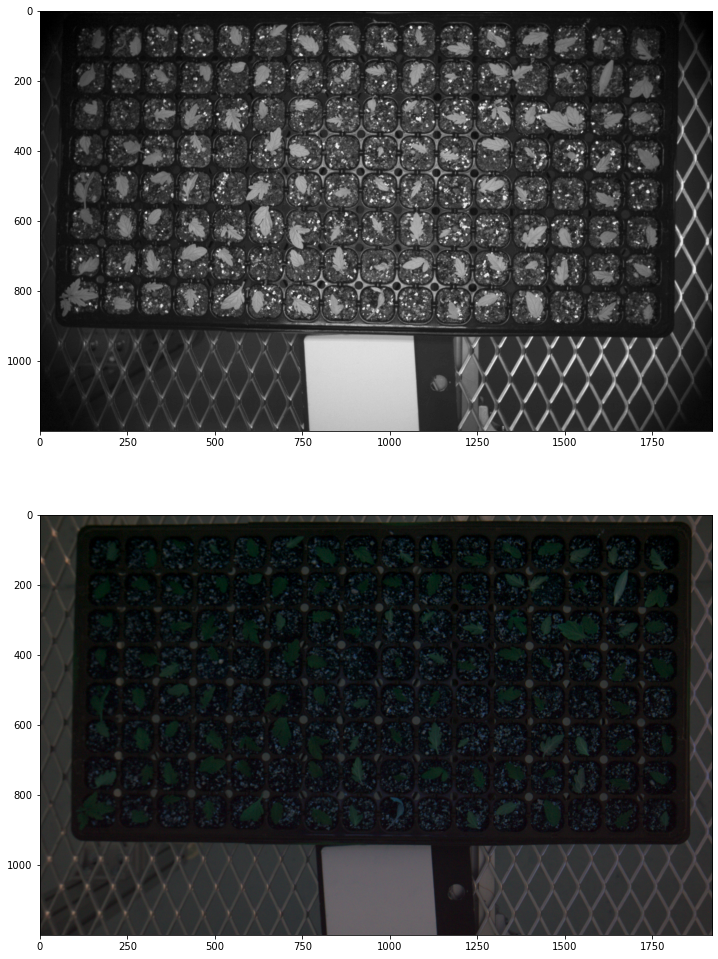

In [10]:
nir_2 = cv2.imread(files[2], cv2.IMREAD_GRAYSCALE)
rgb_2 = cv2.imread(files[3], cv2.IMREAD_UNCHANGED)

fig, axs = plt.subplots(2,1, figsize=(17,17))
axs[0].imshow(nir_2, 'gray')
axs[1].imshow(rgb_2)

In [19]:
rgb_2_int16 = rgb_2.astype(np.int16)
white = rgb_2_int16[1000:1100, 900:1050]
# fig, axs = plt.subplots(3,1,figsize=(17,17,))

red_ref = white[:,:,0]
green_ref = white[:,:,1]
blue_ref = white[:,:,2]

print(np.max(red_ref))
print(np.min(red_ref))
print(np.max(green_ref))
print(np.min(green_ref))
print(np.max(blue_ref))
print(np.min(blue_ref))


# for i in range(0,3):
#     axs[i].imshow(white[:,:,i], 'gray')

115
88
107
89
112
93


(1200, 1920, 3)


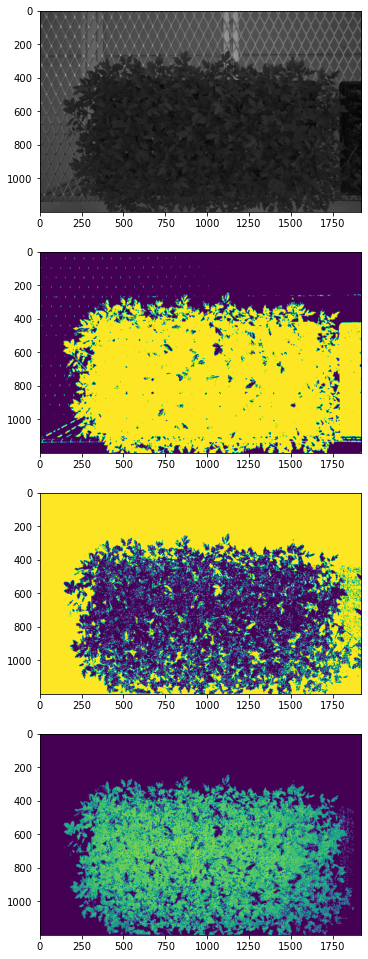

In [53]:
rgbpath = 'd:\\220111_capture\\MOV\\220111165107_01\\220111165107_RGB.png'
nirpath = 'd:\\220111_capture\\MOV\\220111165107_01\\220111165107_NIR.png'
rgb = cv2.imread(rgbpath, cv2.IMREAD_ANYCOLOR)
rgb = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
nir = cv2.imread(nirpath, cv2.IMREAD_GRAYSCALE)
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

#
# rgb = rgb.astype(np.float32)
# rgb[:,:,0] = rgb[:,:,0] / ref_red
# rgb[:,:,1] = rgb[:,:,1] / ref_green
# rgb[:,:,2] = rgb[:,:,2] / ref_blue
# rgb[rgb < 0] = 0
# rgb[rgb > 1] = 1

# rgb = rgb*255
# rgb = rgb.astype(np.uint8)

# nir = nir.astype(np.float32)
# nir = nir / ref_nir

# nir[nir < 0] = 0
# nir[nir > 1] = 1
# nir = nir*255
# nir = nir.astype(np.uint8)
#

brightnessMask = (gray > 150) | (gray < 40)

dh,dw = rgb.shape[:2]
print(rgb.shape)
rgb_rot_mat = cv2.getRotationMatrix2D((dw/2,dh/2),-0.65,1)
rgb_warped = cv2.warpAffine(rgb, rgb_rot_mat,(dw, dh))
#     rgb_warped[15:1200,:1870,0] = nir[:1185,50:]
merged = np.zeros((dh,dw,4))
merged[:,:,0] = rgb_warped[:,:,2]
merged[:,:,1] = rgb_warped[:,:,1]
merged[:,:,2] = rgb_warped[:,:,0]
merged[15:1200,:1870,3] = nir[:1185,50:]

merged_bmask = merged.copy()


#     merged = merged[50:1150, 50:1870]
# fig, axs = plt.subplots(4,1,figsize=(17,17))
for i in range(0,4):
    temp = merged[:,:,i]
    temp[brightnessMask == False] = 0
    merged[:,:,i] = temp
#     axs[i].imshow(temp, 'gray')


blue  = merged[:,:,0]
green = merged[:,:,1]
red   = merged[:,:,2]
nir   = merged[:,:,3]

rgb = np.zeros(red.shape).astype(np.uint32)
rgb = rgb + red + blue + green
rgb[rgb == 0] = 1

r = red/rgb
r[r == 0] = 1
g = green/rgb
g[g == 0] = 1
b = blue/rgb
b[b == 0] = 1

exg = (2*g)-r-b

exgmask = (exg<0.25) | (exg>0.8)

nir[exgmask] = 0
red[exgmask] = 0

ndvi1 = nir-red
ndvi2 = nir+red
ndvi2[ndvi2 == 0] = 1
ndvi = ndvi1/ndvi2

ndvi[ndvi < 0.3] = 0

ndvi_avg = np.nanmean(ndvi)

fig, axs = plt.subplots(4,1,figsize=(17,17))
axs[0].imshow(gray, 'gray')
axs[1].imshow(brightnessMask)
axs[2].imshow(exgmask)
axs[3].imshow(ndvi)

pxcount = np.count_nonzero((exgmask | brightnessMask) == False)
# print('px_count : ',pxcount)
# if pxcount < 10 :
#     v_area = 0
# else:
#     v_area = pxcount * pixelArea / 100
# print(outputbase+'_NDVI.raw')
# print(outputbase+'_Mask.png')